In [ ]:
!pip install geopandas
!apt install libspatialindex-dev
!pip install rtree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.6 MB/s 
     |████████████████████████████████| 16.6 MB 42.8 MB/s 
     |████████████████████████████████| 7.8 MB 35.0 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubu

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Loading Mexico States data into a GeoDataFrame.

Loading Costco Stores Location into a Dataframe.

Converting localization data into a GeoDataFrame, creating points from longitude and latitude from each store.

In [ ]:
estados = gpd.read_file('/content/drive/MyDrive/Data Science (Arnoldo Ramirez) - Learning Gate/Python/03.02 Geovisualizacion | Reto/mexican-states-master/mexican-states.shp')
costco = pd.read_csv('/content/drive/MyDrive/Data Science (Arnoldo Ramirez) - Learning Gate/Python/03.02 Geovisualizacion | Reto/tiendasCostco.csv')
costco.columns = ['id', 'nombre', 'direccion', 'ubicacion', 'latitud', 'longitud', 'tel centro llantero']

estados_reduced = estados.loc[:, ['name', 'geometry']]
costco_final = gpd.GeoDataFrame(costco, geometry=gpd.points_from_xy(costco['longitud'], costco['latitud']))

Adding a new column to categorize in regions. 

In [ ]:
costco_final['Estados'] = ['Puebla', 'Ciudad de México', 'Morelos', 'Ciudad de México', 'Ciudad de México', 'Ciudad de México', 'México', 'México', 'México',
                           'México', 'México', 'Veracruz de Ignacio de la Llave', 'Veracruz de Ignacio de la Llave', 'Querétaro', 'Guanajuato', 'Michoacán de Ocampo',
                           'Guanajuato', 'Guanajuato', 'San Luis Potosí', 'Aguascalientes', 'Jalisco', 'Jalisco', 'Tabasco', 'Jalisco', 'Nuevo León',
                           'Nuevo León', 'Coahuila', 'Nuevo León', 'Yucatán', 'Sinaloa', 'Quintana Roo', 
                           'Baja California Sur', 'Chihuahua', 'Chihuahua', 'Sonora', 'Baja California', 'Baja California', 'Baja California', 'Baja California']

regiones = pd.DataFrame(
    {'Estados': ['Tlaxcala', 'Puebla', 'Ciudad de México', 'Morelos', 'México', 'Hidalgo','Jalisco', 'Michoacán de Ocampo', 'Colima', 'Aguascalientes', 'Nayarit', 
                 'Zacatecas', 'San Luis Potosí', 'Guanajuato', 'Querétaro', 'Chihuahua', 'Coahuila', 'Nuevo León', 'Tamaulipas', 'Durango', 'Baja California', 
                 'Baja California Sur', 'Sonora', 'Sinaloa', 'Guerrero', 'Veracruz de Ignacio de la Llave', 'Oaxaca', 'Tabasco', 'Chiapas', 'Campeche', 'Yucatán', 'Quintana Roo'],
     'Region':['Centro', 'Centro', 'Centro', 'Centro', 'Centro', 'Centro',
               'Centro Oeste', 'Centro Oeste', 'Centro Oeste', 'Centro Oeste', 'Centro Oeste', 'Centro Oeste', 'Centro Oeste', 'Centro Oeste', 'Centro Oeste',
               'Noreste', 'Noreste', 'Noreste', 'Noreste', 'Noreste',
               'Noroeste', 'Noroeste', 'Noroeste', 'Noroeste',
               'Sureste', 'Sureste', 'Sureste', 'Sureste', 'Sureste', 'Sureste', 'Sureste', 'Sureste']})

costco_final = pd.merge(costco_final, regiones, on='Estados', how='inner')
costco_final

,id,nombre,direccion,ubicacion,latitud,longitud,tel centro llantero,geometry,Estados,Region
0,1,"""Puebla""",Blvd. del Niño Poblano 2904,Puebla,19.033499,-98.237794,222 2273 318,POINT (-98.23779 19.03350),Puebla,Centro
1,2,"""Villa Coapa""",Puente 186,Coapa,19.284359,-99.138655,NaN,POINT (-99.13865 19.28436),Ciudad de México,Centro
2,4,"""Lindavista""",Av. Insurgentes Norte 1320,Gustavo A. Madero,19.481697,-99.130063,55 5747 5691,POINT (-99.13006 19.48170),Ciudad de México,Centro
3,5,"""Mixcoac""",Blvd. Adolfo López Mateos 1181,Alvaro Obregón,19.387237,-99.190718,NaN,POINT (-99.19072 19.38724),Ciudad de México,Centro
4,6,"""Polanco""",Blvd. Miguel de Cervantes Saavedra 397,Miguel Hidalgo,19.441589,-99.205685,55 2122 0262,POINT (-99.20569 19.44159),Ciudad de México,Centro
5,3,"""Cuernavaca""",Av. Vicente Guerrero 205,Cuernavaca,18.934481,-99.233430,777 7101 523,POINT (-99.23343 18.93448),Morelos,Centro
6,7,"""Interlomas""",Blvd. Magnocentro 4,Huixquilucan,19.403408,-99.273534,NaN,POINT (-99.27353 19.40341),México,Centro
7,8,"""Arboledas""",Av. San Nicolás 10,Tlalnepantla,19.551253,-99.202903,55 5321 3295,POINT (-99.20290 19.55125),México,Centro
8,9,"""Satélite""",Circuito Centro Comercial 2001,Naucalpan,19.507850,-99.235338,NaN,POINT (-99.23534 19.50785),México,Centro
9,10,"""Atizapán""","Av. Ruiz Cortines 1 Mz, 3 Lte 3",Atizapán de Zaragoza,19.548234,-99.270803,55 2345 0155,POINT (-99.27080 19.54823),México,Centro


In [ ]:
# Joining each segment 
costco_centro = costco_final.loc[costco_final['Region']=='Centro']
costco_noreste = costco_final.loc[costco_final['Region']=='Noreste']
costco_noroeste = costco_final.loc[costco_final['Region']=='Noroeste']
costco_centrooeste = costco_final.loc[costco_final['Region']=='Centro Oeste']
costco_sureste = costco_final.loc[costco_final['Region']=='Sureste']

In [ ]:
costco_final['Count'] = 0
costco_final.loc[costco_final['Region'] == 'Centro','Count'] = len(costco_centro)
costco_final.loc[costco_final['Region'] == 'Noreste','Count'] = len(costco_noreste)
costco_final.loc[costco_final['Region'] == 'Noroeste','Count'] = len(costco_noroeste)
costco_final.loc[costco_final['Region'] == 'Centro Oeste','Count'] = len(costco_centrooeste)
costco_final.loc[costco_final['Region'] == 'Sureste','Count'] = len(costco_sureste)

In [ ]:
costco_final.sample(5)

,id,nombre,direccion,ubicacion,latitud,longitud,tel centro llantero,geometry,Estados,Region,Count
30,31,"""Cancún""",Av. Kabah 24,Cancún,21.148481,-86.835460,NaN,"POLYGON ((-9546479.190 2394182.989, -9547057.0...",Quintana Roo,Sureste,5
0,1,"""Puebla""",Blvd. del Niño Poblano 2904,Puebla,19.033499,-98.237794,222 2273 318,"POLYGON ((-10815781.179 2144952.355, -10816359...",Puebla,Centro,11
38,39,"""Tijuana Río""",Blvd. Rodolfo Sánchez Taboada 8943,Tijuana,32.531917,-117.028910,664 4633 573,"POLYGON ((-12907598.692 3810360.942, -12908176...",Baja California,Noroeste,7
33,34,"""Juárez""",Rancho Agua Caliente 6911,Cd. Juárez,31.702320,-106.423166,646 6172 828,"POLYGON ((-11726972.659 3701846.931, -11727550...",Chihuahua,Noreste,6
5,3,"""Cuernavaca""",Av. Vicente Guerrero 205,Cuernavaca,18.934481,-99.233430,777 7101 523,"POLYGON ((-10926614.869 2133365.534, -10927192...",Morelos,Centro,11


In [ ]:
costco_final = costco_final.set_crs(estados_reduced.crs)
#GeoDataFrames will use CRS epsg=3395 to use meter as distance measure
estados_reduced = estados_reduced.to_crs(epsg=3395)
costco_final = costco_final.to_crs(epsg=3395)

Creating a 120Km buffer around location points from each store.

Graph regions intersection with created circles. 


In [ ]:
costco_final['geometry'] = costco_final.buffer(120000)

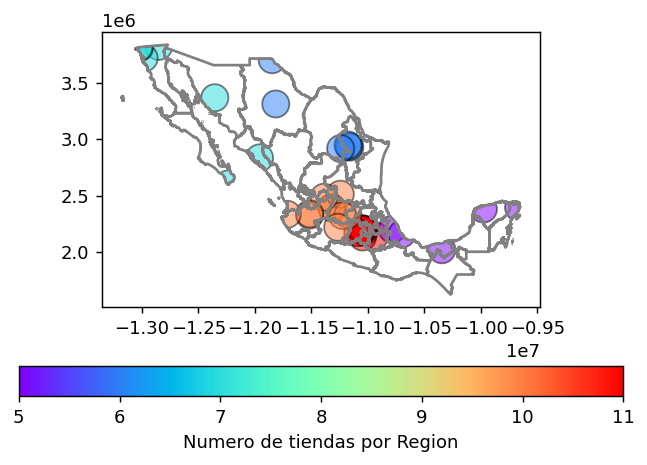

In [ ]:
fig = plt.figure(dpi=130)

zonas_reparto = gpd.overlay(estados_reduced, costco_final, how='intersection')
ax = estados_reduced.boundary.plot(color='gray', ax=plt.gca())
zonas_reparto.plot(column='Count', ax=ax, edgecolor='k', alpha=0.5, cmap='rainbow', legend=True, legend_kwds={'label':'Numero de tiendas por Region',
                                                                                                           'orientation':'horizontal'})

In [ ]:
table = costco_final[['Region', 'Count']].groupby('Region').count()
table.sort_values(by='Count', ascending=False)

,Count
Region,
Centro,11
Centro Oeste,10
Noroeste,7
Noreste,6
Sureste,5
